# [COVID-19] - Data visualization and Analysis.

Covid-19, also known as coronavirus, is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). It was primally identified in December 2019 in Wuhan, China and has spread globally, resulting in an ongoing pandemic (Wikipedia). This notebook shows the impact caused by covid around the world and brings a brief study in Brazil.


---

#### Last time executed:

In [1]:
import datetime as dt
print(dt.datetime.now())

2020-06-07 19:55:44.514116


#### Libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

#### Data obtained from Johns Hopkins University.<br> 
Source: https://github.com/CSSEGISandData/COVID-19

In [3]:
df_confirmed_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/C" +
                                 "OVID-19/master/csse_covid_19_data/csse_covid_19_ti" +
                                 "me_series/time_series_covid19_confirmed_global.csv")
df_recovered_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVI" +
                                 "D-19/master/csse_covid_19_data/csse_covid_19_time_ser" +
                                 "ies/time_series_covid19_recovered_global.csv")
df_death_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/" +
                             "master/csse_covid_19_data/csse_covid_19_time_series/time_s" +
                             "eries_covid19_deaths_global.csv")

In [4]:
df_confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,763,764,764,764,765,844,851,852,852,852
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,74,81,84,86,86,86,86,86,86,88


In [5]:
df_recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1209,1259,1303,1328,1428,1450,1522,1585,1762,1830
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,823,851,857,872,877,891,898,898,910,925
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,5277,5422,5549,5748,5894,6067,6218,6297,6453,6631
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,681,684,692,694,698,733,735,738,741,741
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,18,18,18,18,18,18,18,18,21,24


In [6]:
df_death_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,235,246,249,257,265,270,294,300,309,327
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,33,33,33,33,33,33,33,33,33,34
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,630,638,646,653,661,667,673,681,690,698
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [7]:
start_date = '1/22/20'
# end_date = (dt.datetime.today() - dt.timedelta(days=1)).strftime('%-m/%d/%y')
end_date = df_confirmed_cases.columns[-1]

In [8]:
df_top10 = df_confirmed_cases.groupby(['Country/Region']).sum()
df_top10 = df_top10.loc[:, start_date:end_date]
df_top10 = df_top10.sort_values(by=[end_date]).tail(10)

In [9]:
df_top10

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Germany,0,0,0,0,0,1,4,4,4,5,...,182196,182922,183189,183410,183594,183879,184121,184472,184924,185450
France,0,0,2,3,3,3,4,5,5,5,...,186364,186923,188752,189009,189348,188450,192330,189569,190180,190759
Peru,0,0,0,0,0,0,0,0,0,0,...,141779,148285,155671,164476,170039,170039,178914,183198,187400,191758
Italy,0,0,0,0,0,0,0,0,0,2,...,231732,232248,232664,232997,233197,233515,233836,234013,234531,234801
Spain,0,0,0,0,0,0,0,0,0,0,...,237906,238564,239228,239479,239638,239932,240326,240660,240978,241310
India,0,0,0,0,0,0,0,0,1,1,...,165386,173491,181827,190609,198370,207191,216824,226713,236184,246622
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,270508,272607,274219,276156,277736,279392,281270,283079,284734,286294
Russia,0,0,0,0,0,0,0,0,0,2,...,379051,387623,396575,405843,414328,423186,431715,440538,449256,458102
Brazil,0,0,0,0,0,0,0,0,0,0,...,438238,465166,498440,514849,526447,555383,584016,614941,645771,672846


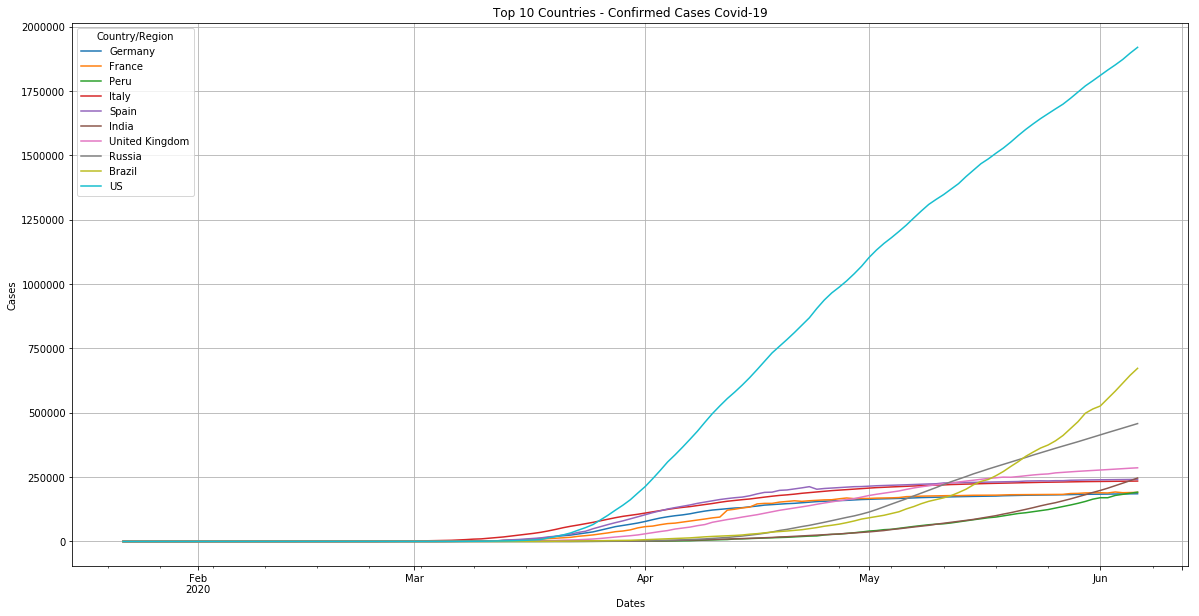

In [10]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(1,1,1)
df_top10 = df_top10.T
df_top10.index = pd.to_datetime(df_top10.index)
df_top10.plot(ax=ax, legend=True)
ax.set_title("Top 10 Countries - Confirmed Cases Covid-19", fontsize=12)
ax.grid(True)
ax.set(xlabel='Dates', ylabel="Cases");

Extracting data about recovered cases from Top 10 Countries Confimed Cases by name.

In [11]:
top10_countries = df_top10.columns.tolist() # Name of countries inside top 10
# Searching recovered cases with the top10 countries name.
df_recovered = df_recovered_cases.loc[df_recovered_cases['Country/Region'].isin(top10_countries)]
df_recovered = df_recovered.groupby(['Country/Region']).sum()
df_recovered = df_recovered.loc[:, start_date:end_date]
df_recovered = df_recovered.sort_values(by=[end_date]).tail(10)

In [12]:
df_recovered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,1167,1172,1187,1190,1221,1224,1212,1219,1228,1230
France,0,0,0,0,0,0,0,0,0,0,...,67309,67921,68386,68473,68558,68930,69573,70094,70622,70924
Peru,0,0,0,0,0,0,0,0,0,0,...,59442,62791,66447,67208,68507,69257,72319,76228,79214,82731
India,0,0,0,0,0,0,0,0,0,0,...,70920,82627,86936,91852,95754,100285,104071,108450,113233,118695
Spain,0,0,0,0,0,0,0,0,0,0,...,150376,150376,150376,150376,150376,150376,150376,150376,150376,150376
Italy,0,0,0,0,0,0,0,0,0,0,...,150604,152844,155633,157507,158355,160092,160938,161895,163781,165078
Germany,0,0,0,0,0,0,0,0,0,0,...,163360,164245,164908,165352,165632,166609,167453,167909,168480,168958
Russia,0,0,0,0,0,0,0,0,0,0,...,150993,159257,167469,171883,175514,186602,195559,204197,212237,220935
Brazil,0,0,0,0,0,0,0,0,0,0,...,177604,189476,200892,206555,211080,223638,238617,254963,266940,277149


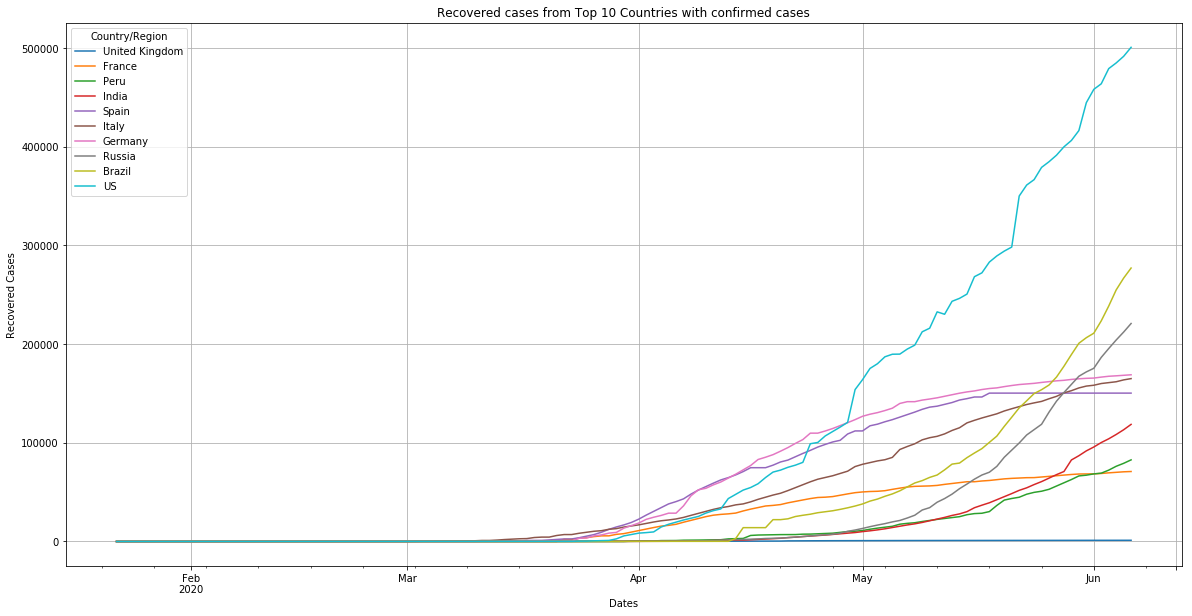

In [13]:
fig = plt.figure(figsize = (20, 10))
ax_2 = fig.add_subplot(1,1,1)
df_recovered = df_recovered.T
df_recovered.index = pd.to_datetime(df_recovered.index)
df_recovered.plot(ax=ax_2, legend=True)
ax_2.set_title("Recovered cases from Top 10 Countries with confirmed cases", fontsize=12)
ax_2.grid(True)
ax_2.set(xlabel='Dates', ylabel='Recovered Cases');

In [14]:
df_death = df_death_cases.loc[df_death_cases['Country/Region'].isin(top10_countries)]
df_death = df_death.groupby(['Country/Region']).sum()
df_death = df_death.loc[:, start_date:end_date]
df_death = df_death.sort_values(by=[end_date]).tail(10)

In [15]:
df_death

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Peru,0,0,0,0,0,0,0,0,0,0,...,4099,4230,4371,4506,4634,4634,4894,5031,5162,5301
Russia,0,0,0,0,0,0,0,0,0,0,...,4142,4374,4555,4693,4849,5031,5208,5376,5520,5717
India,0,0,0,0,0,0,0,0,0,0,...,4711,4980,5185,5408,5608,5829,6088,6363,6649,6946
Germany,0,0,0,0,0,0,0,0,0,0,...,8470,8504,8530,8540,8555,8563,8602,8635,8658,8673
Spain,0,0,0,0,0,0,0,0,0,0,...,27119,27121,27125,27127,27127,27127,27128,27133,27134,27135
France,0,0,0,0,0,0,0,0,0,0,...,28665,28717,28774,28805,28836,28943,29024,29068,29114,29145
Italy,0,0,0,0,0,0,0,0,0,0,...,33142,33229,33340,33415,33475,33530,33601,33689,33774,33846
Brazil,0,0,0,0,0,0,0,0,0,0,...,26754,27878,28834,29314,29937,31199,32548,34021,35026,35930
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,37919,38243,38458,38571,39127,39452,39811,39987,40344,40548


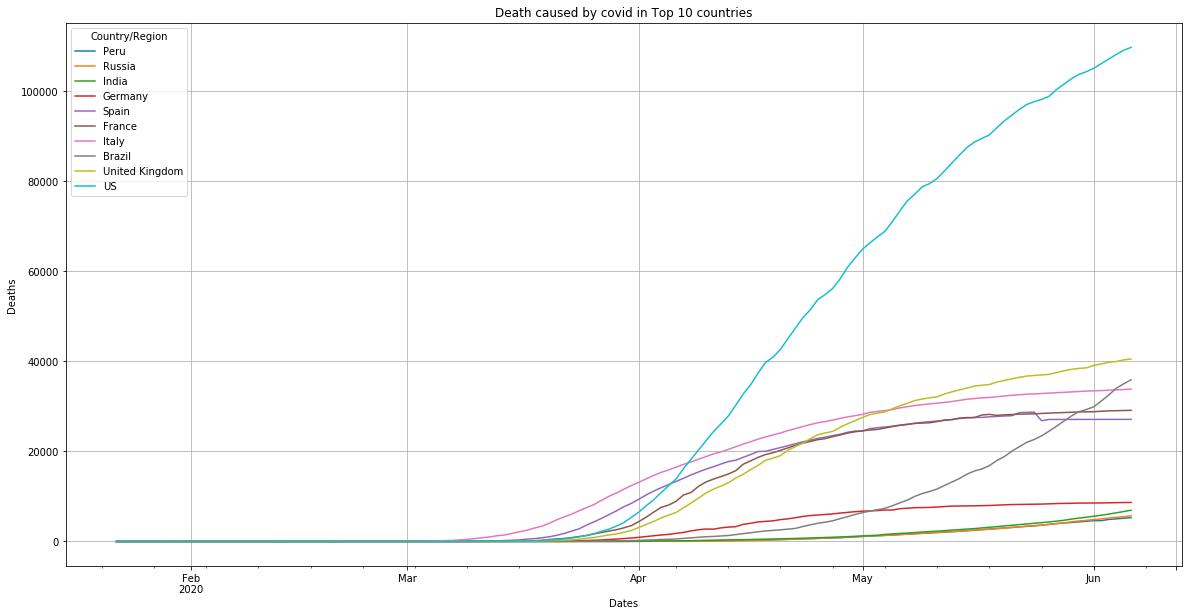

In [16]:
fig = plt.figure(figsize = (20, 10))
ax_4 = fig.add_subplot(1,1,1)
df_death = df_death.T
df_death.index = pd.to_datetime(df_death.index)
df_death.plot(ax=ax_4, legend=True)
ax_4.set_title("Death caused by covid in Top 10 countries", fontsize=12)
ax_4.grid(True)
ax_4.set(xlabel='Dates', ylabel='Deaths');

$$\text{Active cases} = Confirmed - Recovered - Deaths $$

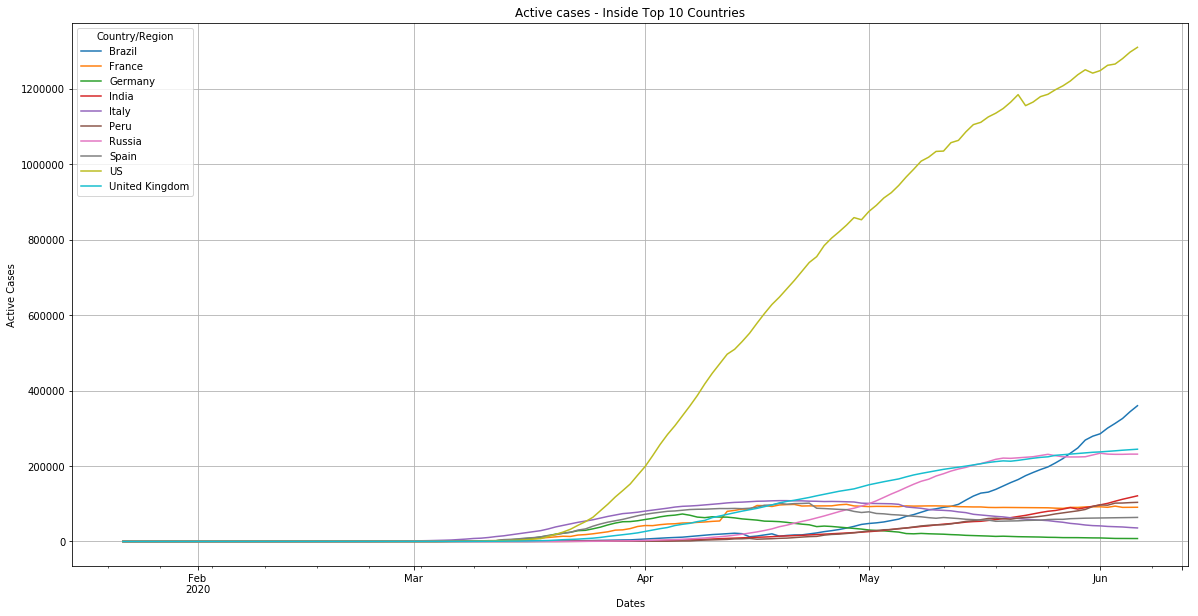

In [17]:
fig = plt.figure(figsize = (20, 10))
ax_5 = fig.add_subplot(1,1,1)
df_active = df_top10 - df_recovered - df_death
df_active.plot(ax=ax_5, legend=True)
ax_5.set_title("Active cases - Inside Top 10 Countries", fontsize=12)
ax_5.grid(True)
ax_5.set(xlabel='Dates', ylabel='Active Cases');

---

## Brazil case study


In [18]:
df_brazil_confirmed = df_confirmed_cases.loc[df_confirmed_cases['Country/Region'].isin(['Brazil'])]
df_brazil_recovered = df_recovered_cases.loc[df_recovered_cases['Country/Region'].isin(['Brazil'])]
df_brazil_deaths = df_death_cases.loc[df_death_cases['Country/Region'].isin(['Brazil'])]

In [19]:
df_brazil_confirmed = df_brazil_confirmed.loc[:,start_date:end_date].T
df_brazil_confirmed.index = pd.to_datetime(df_brazil_confirmed.index)
df_brazil_confirmed.columns = ['Cases']

df_brazil_recovered = df_brazil_recovered.loc[:,start_date:end_date].T
df_brazil_recovered.index = pd.to_datetime(df_brazil_recovered.index)
df_brazil_recovered.columns = ['Cases']

df_brazil_deaths = df_brazil_deaths.loc[:,start_date:end_date].T
df_brazil_deaths.index = pd.to_datetime(df_brazil_deaths.index)
df_brazil_deaths.columns = ['Cases']

df_brazil_active = df_brazil_confirmed - df_brazil_recovered - df_brazil_deaths
df_brazil_closed = df_brazil_recovered + df_brazil_deaths

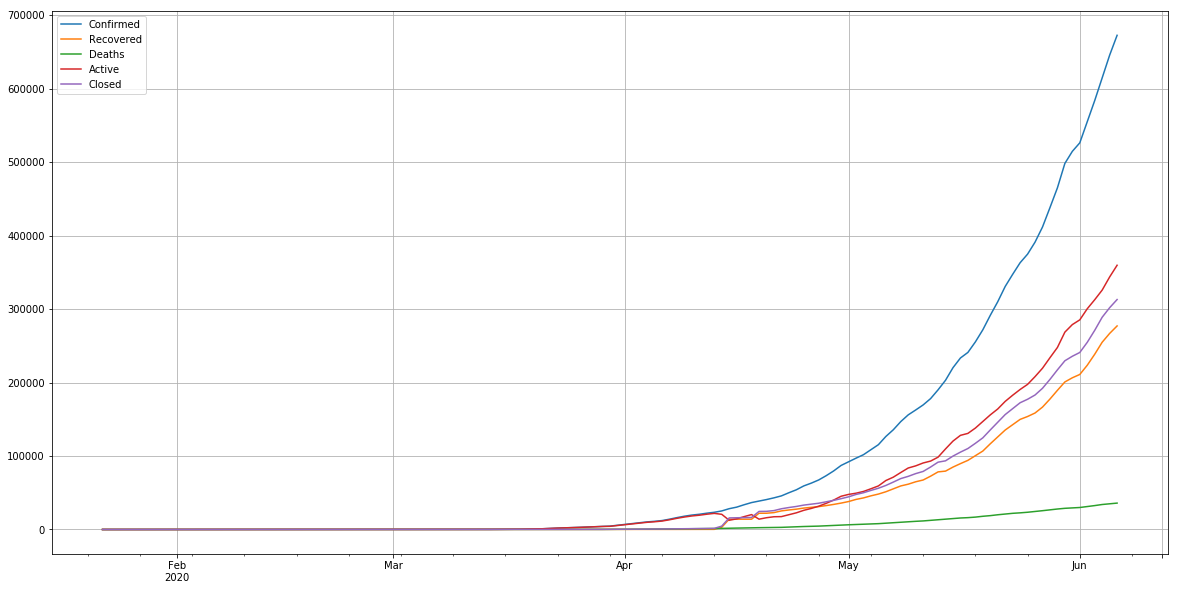

In [20]:
fig = plt.figure(figsize = (20, 10))
ax_6 = fig.add_subplot(1,1,1)
legend_name = ['Confirmed', 'Recovered', 'Deaths', 'Active', 'Closed']
df_brazil_confirmed.plot(ax=ax_6, legend=True)
df_brazil_recovered.plot(ax=ax_6, legend=True)
df_brazil_deaths.plot(ax=ax_6, legend=True)
df_brazil_active.plot(ax=ax_6, legend=True)
df_brazil_closed.plot(ax=ax_6, legend=True)
ax_6.legend(legend_name)
ax_6.grid(True)

### Data about last 24 hours

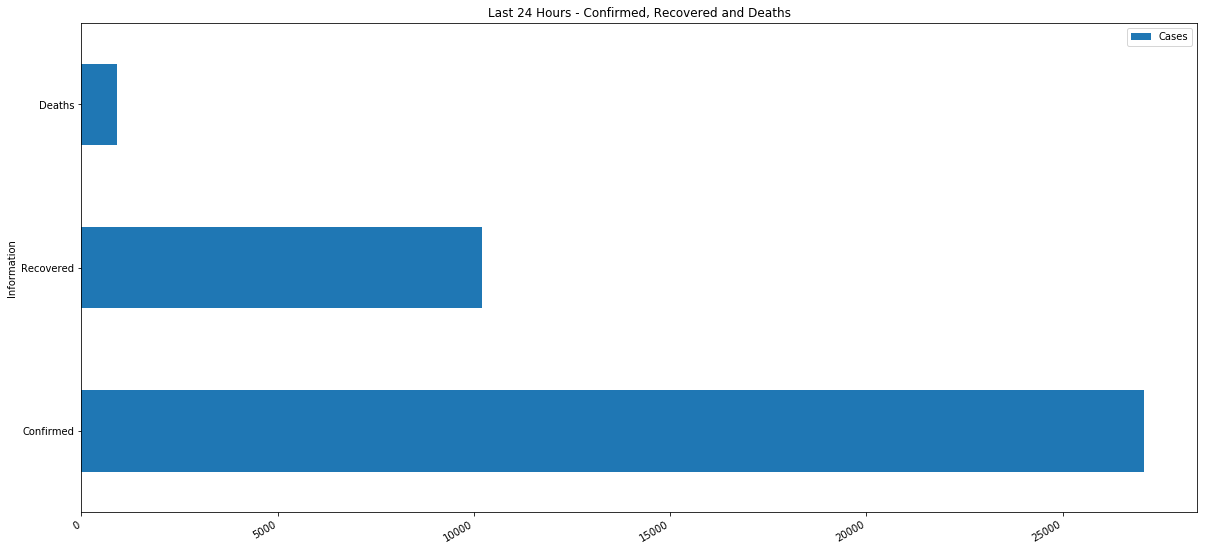

In [21]:
confirmed_daily = df_brazil_confirmed.iloc[-1,0] - df_brazil_confirmed.iloc[-2,0]
recovered_daily = df_brazil_recovered.iloc[-1,0] - df_brazil_recovered.iloc[-2,0]
deaths_daily = df_brazil_deaths.iloc[-1,0] - df_brazil_deaths.iloc[-2,0]
data = {'Information':['Confirmed', 'Recovered', 'Deaths'], 'Cases':[confirmed_daily, recovered_daily, deaths_daily]}
df_last24hours = pd.DataFrame(data)
fig = plt.figure(figsize = (20, 10))
ax_7 = fig.add_subplot(1,1,1)
df_last24hours.plot.barh(ax=ax_7, x='Information')
ax_7.set_title("Last 24 Hours - Confirmed, Recovered and Deaths",fontsize=12)
fig.autofmt_xdate()

### Growth rate by week in Brazil

In [22]:
df_growth_confirmed = df_brazil_confirmed.pct_change(axis='index', periods=7)
df_growth_recovered = df_brazil_recovered.pct_change(axis='index', periods=7)
df_growth_deaths = df_brazil_deaths.pct_change(axis='index', periods=7)

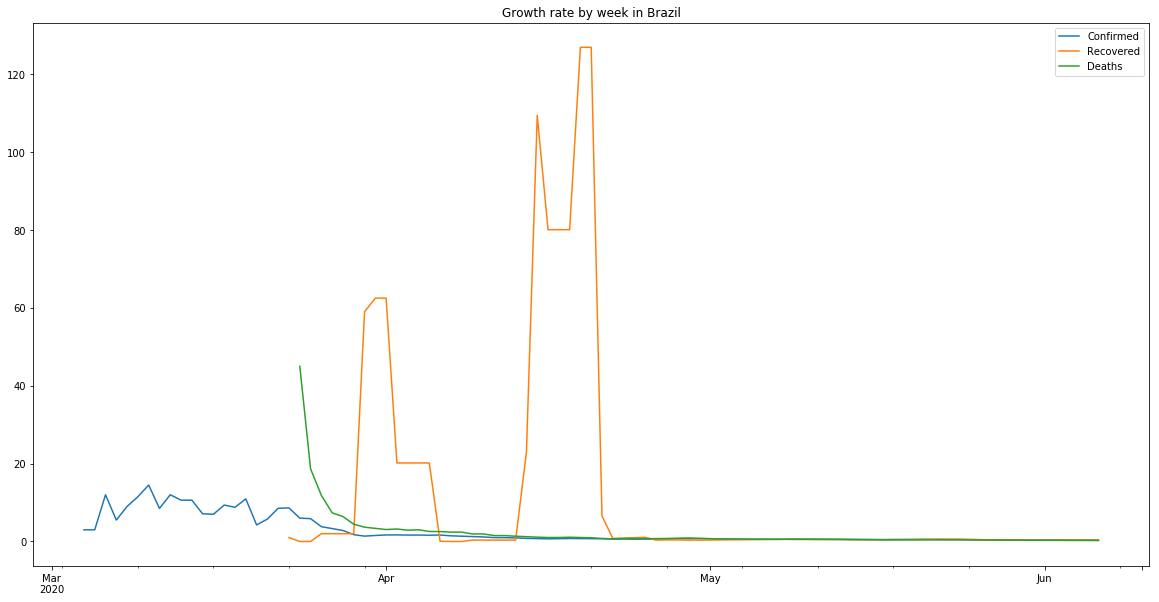

In [23]:
fig = plt.figure(figsize = (20, 10))
ax_8 = fig.add_subplot(1,1,1)
df_names = ['Confirmed', 'Recovered', 'Deaths']
df_growth_confirmed.plot(ax=ax_8, legend=True)
df_growth_recovered.plot(ax=ax_8, legend=True)
df_growth_deaths.plot(ax=ax_8, legend=True)
ax_8.set_title('Growth rate by week in Brazil', fontsize=12)
ax_8.legend(df_names);

### Growth rate by day in Brazil

In [24]:
df_growth_confirmed = df_brazil_confirmed.pct_change(axis='index', periods=1)
df_growth_recovered = df_brazil_recovered.pct_change(axis='index', periods=1)
df_growth_deaths = df_brazil_deaths.pct_change(axis='index', periods=1)

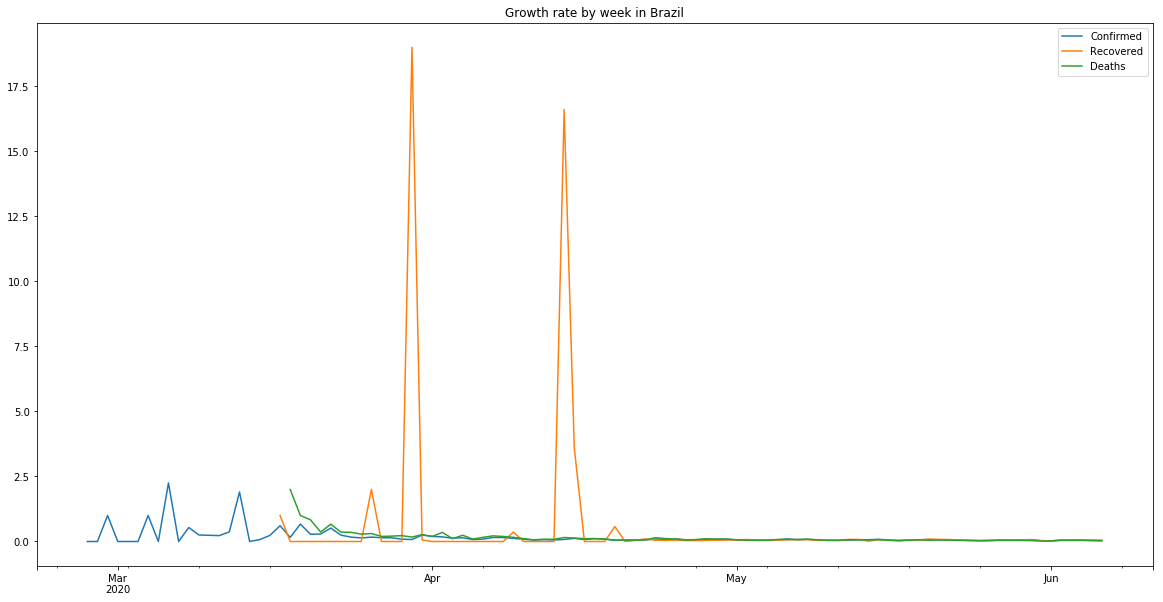

In [25]:
fig = plt.figure(figsize = (20, 10))
ax_9 = fig.add_subplot(1,1,1)
df_names = ['Confirmed', 'Recovered', 'Deaths']
df_growth_confirmed.plot(ax=ax_9, legend=True)
df_growth_recovered.plot(ax=ax_9, legend=True)
df_growth_deaths.plot(ax=ax_9, legend=True)
ax_9.set_title('Growth rate by week in Brazil', fontsize=12)
ax_9.legend(df_names);

### Mortality rate and Recovery rate


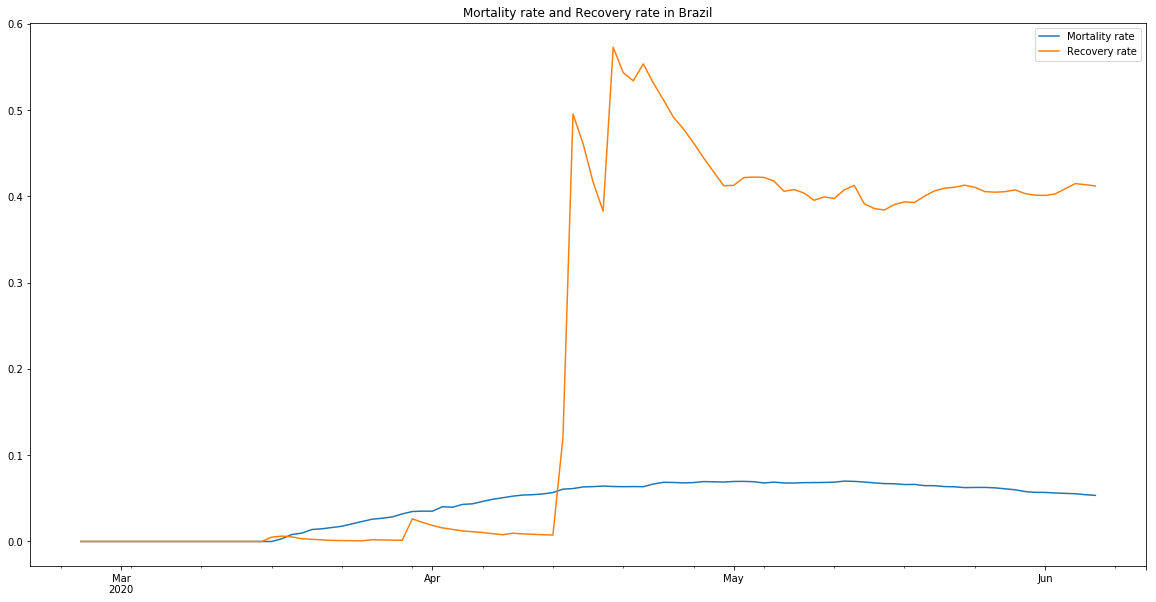

In [26]:
mortality_rate = df_brazil_deaths/df_brazil_confirmed
recovery_rate = df_brazil_recovered/df_brazil_confirmed
fig = plt.figure(figsize = (20, 10))
ax_10 = fig.add_subplot(1,1,1)
df_names=['Mortality rate','Recovery rate']
mortality_rate.plot(ax=ax_10)
recovery_rate.plot(ax=ax_10)
ax_10.legend(df_names)
ax_10.set_title('Mortality rate and Recovery rate in Brazil', fontsize=12);

### Doubling Rate

$\text{This formula represents the days necessary to cases double.}$

$$\text{Doubling rate} = \frac{T}{(\log _{2}(\text{Total cases until day (X + T)}) - \log _{2}(\text{Total cases until day (X)})}$$

$\text{Where T is a period in days and X is a specific day to start a period.}$


#### Doubling rate of confirmed cases

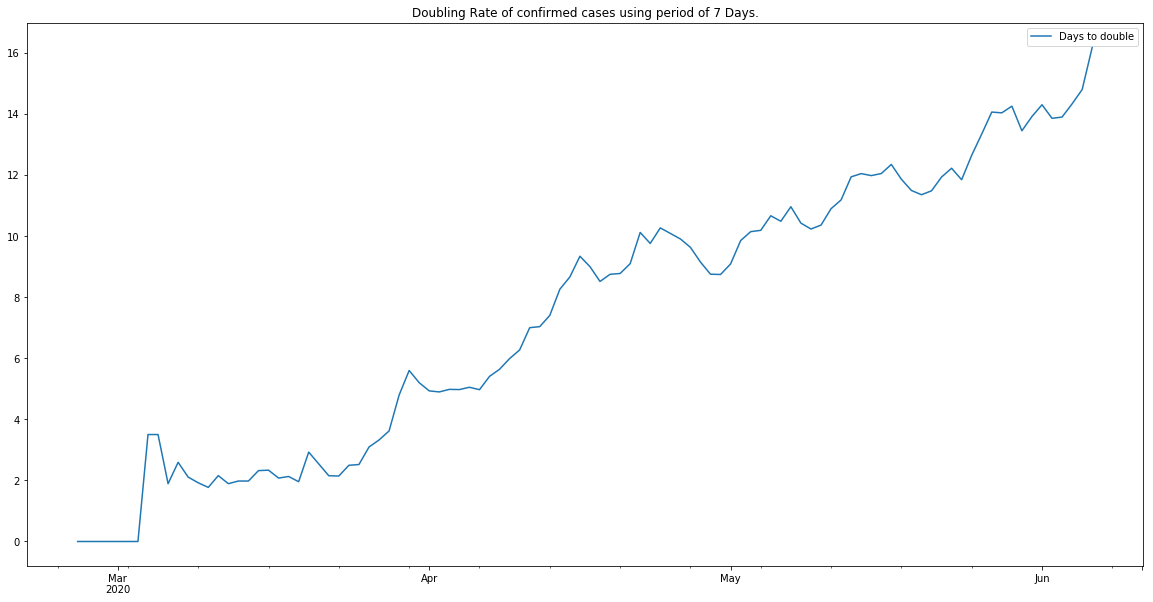

In [27]:
def doubling_rate_week(x):
    return 7/x

fig = plt.figure(figsize = (20, 10))
ax_11 = fig.add_subplot(1,1,1)
doubling_confirmed = df_brazil_confirmed.apply(np.log2, axis=0) # Log2(All Days)
doubling_confirmed = doubling_confirmed.diff(periods=7, axis=0) # Log2(Day+7) - Log2(7)
doubling_confirmed = doubling_confirmed.apply(doubling_rate_week, axis=0) # 7/(Log2(Day+7)-Log2(Day))

doubling_confirmed.plot(ax=ax_11)
ax_11.legend(['Days to double'])
ax_11.set_title('Doubling Rate of confirmed cases using period of 7 Days.', fontsize=12);


#### Doubling rate of recovered cases

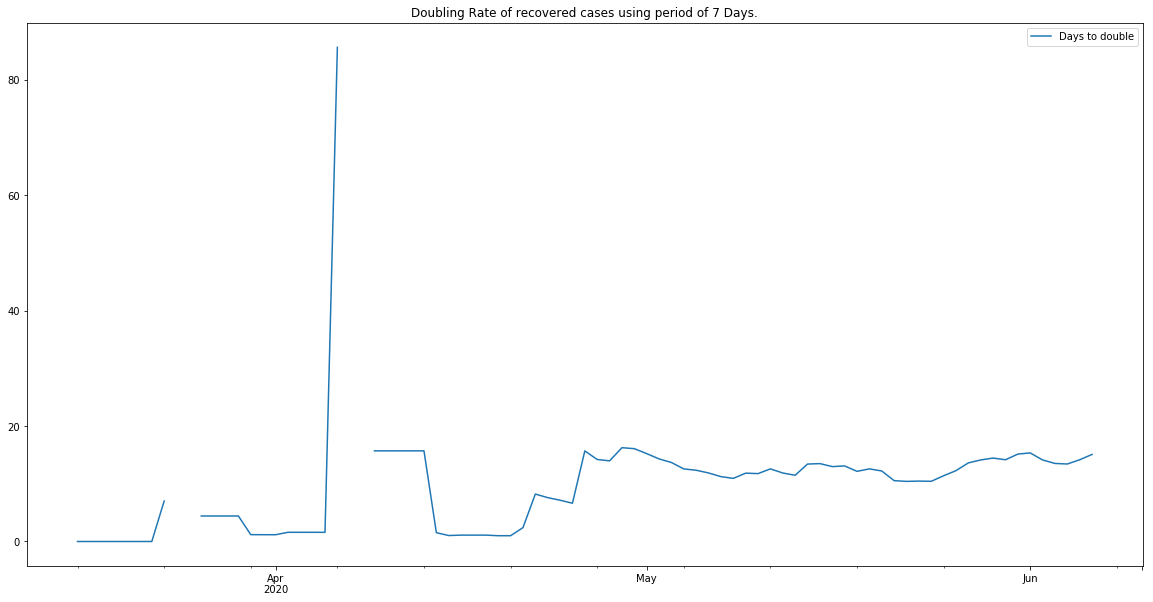

In [28]:
fig = plt.figure(figsize = (20, 10))
ax_12 = fig.add_subplot(1,1,1)
doubling_recovered = df_brazil_recovered.apply(np.log2, axis=0) # Log2(All Days)
doubling_recovered = doubling_recovered.diff(periods=7, axis=0) # Log2(Day+7) - Log2(7)
doubling_recovered = doubling_recovered.apply(doubling_rate_week, axis=0) # 7/(Log2(Day+7)-Log2(Day))
doubling_recovered.plot(ax=ax_12)
ax_12.legend(['Days to double'])
ax_12.set_title('Doubling Rate of recovered cases using period of 7 Days.', fontsize=12);

#### Doubling rate of death cases

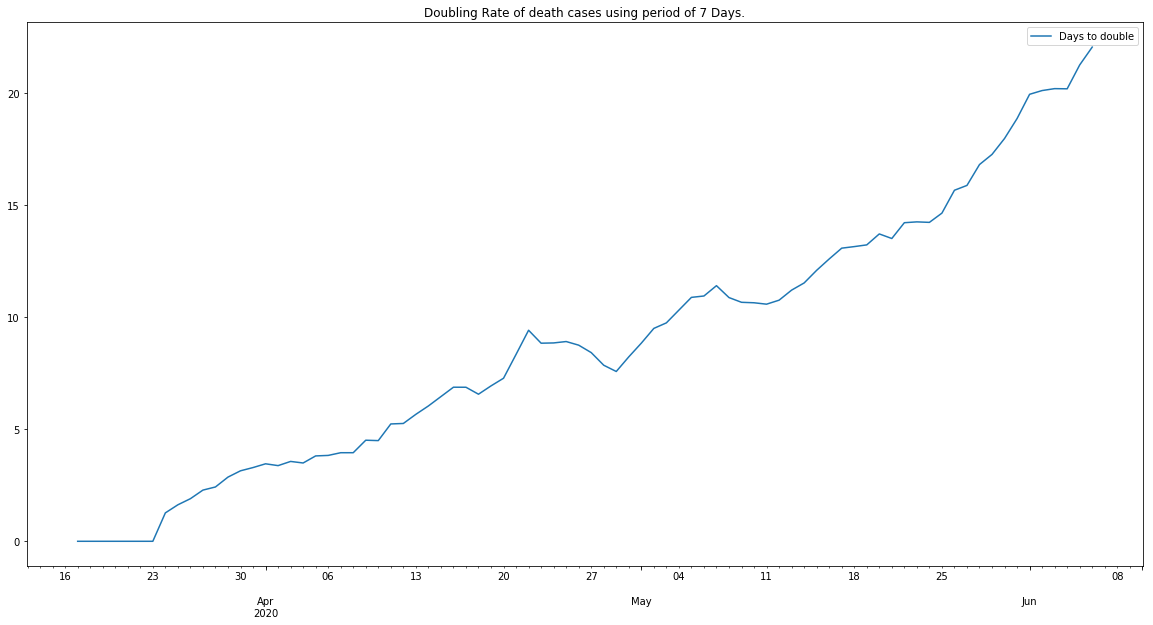

In [29]:
fig = plt.figure(figsize = (20, 10))
ax_13 = fig.add_subplot(1,1,1)
doubling_deaths = df_brazil_deaths.apply(np.log2, axis=0) # Log2(All Days)
doubling_deaths = doubling_deaths.diff(periods=7, axis=0) # Log2(Day+7) - Log2(7)
doubling_deaths = doubling_deaths.apply(doubling_rate_week, axis=0) # 7/(Log2(Day+7)-Log2(Day))
doubling_deaths.plot(ax=ax_13)
ax_13.legend(['Days to double'])
ax_13.set_title('Doubling Rate of death cases using period of 7 Days.', fontsize=12);

---

In [34]:
def nice_axes(ax):
    ax.set_facecolor('.8')
    ax.tick_params(labelsize=8, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]

def prepare_data(df_original, steps=5):
    df = df_original
    df.index.name = 'date'
    df = df.reset_index()
    df.index = df.index * steps
    last_idx = df.index[-1] + 1
    df_expanded = df.reindex(range(last_idx))
    df_expanded['date'] = df_expanded['date'].fillna(method='ffill')
    df_expanded = df_expanded.set_index('date')
    df_rank_expanded = df_expanded.rank(axis=1, method='first')
    df_expanded = df_expanded.interpolate()
    df_rank_expanded = df_rank_expanded.interpolate()
    return df_expanded, df_rank_expanded

df_expanded, df_rank_expanded = prepare_data(df_top10)
labels = df_expanded.columns
colors = [np.random.rand(3,) for i in range(10)] 

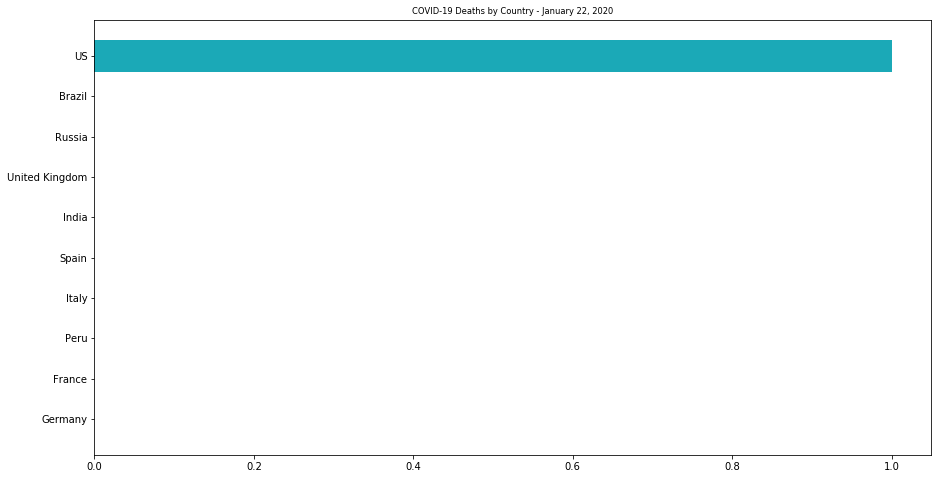

In [37]:
def init():
    ax.clear()
    nice_axes(ax)
    ax.set_ylim(.2, 6.8)

def update(i):
    for bar in ax.containers:
        bar.remove()
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    date_str = df_expanded.index[i].strftime('%B %-d, %Y')
    ax.set_title(f'COVID-19 Deaths by Country - {date_str}', fontsize='smaller') 

fig, ax = plt.subplots(figsize=(15, 8))
anim = FuncAnimation(fig=fig, func=update, frames=range(0, len(df_expanded)), interval=100, repeat=False)
#HTML(anim.to_jshtml()) 

### Animated Graphics